In [ ]:
# this notebook contains methods to train a word2vec model on a corpus, use CDE to extract molecules from text
# and pubchempy to look up structures

# There is also a method to analyze word2vec's evolution as more publications are added to 

In [2]:
import pandas as pd
import numpy as np
import chemdataextractor as cde
import gensim, logging
import os
from chemdataextractor.doc import Paragraph
import sklearn
from gensim.models import Word2Vec
import pubchempy as pcp

In [3]:
import time

In [230]:
desktop = '/Users/DavidJuergens/Desktop/'
os.chdir('/Users/DavidJuergens/Google Drive File Stream/Shared drives/ChemE NLP Team Drive/Corrosion Inhibitors/')

In [397]:
os.chdir('/Users/DavidJuergens/Google Drive File Stream/Shared drives/ChemE NLP Team Drive/Corrosion Inhibitors/')

In [398]:
file = open('rank-2-CIpubs.txt','r')

In [399]:
os.chdir('/Users/DavidJuergens/Desktop/BETO2020/scripts/')
import tfidf_wrapper
from tfidf_wrapper import tfidf_model
os.chdir('/Users/DavidJuergens/Desktop/BETO2020/data/ScienceDirect URLs/')
df = pd.read_csv('corrosion_inhib_link_data.txt','r')

In [400]:
os.chdir(desktop)

In [401]:
pubs = [] 
for pub in file:
    pubs.append(pub)

In [402]:
file = open('test_pubs.txt','w')
for i in range(len(pubs)):
    file.write(pubs[i])
file.close()

In [403]:
cems = []
counter = 0
with open('test_pubs.txt','r') as file:
    for pub in file:
        counter+=1
        if counter % 10 == 0:
            print('publication number ', counter)
        para = Paragraph(pub)
        mols = para.cems
        for mol in mols:
            if mol.text not in cems:
                cems.append(mol.text)
    

publication number  10
publication number  20
publication number  30
publication number  40
publication number  50
publication number  60
publication number  70
publication number  80
publication number  90
publication number  100
publication number  110
publication number  120
publication number  130
publication number  140
publication number  150
publication number  160
publication number  170
publication number  180
publication number  190
publication number  200
publication number  210
publication number  220
publication number  230
publication number  240
publication number  250
publication number  260
publication number  270
publication number  280
publication number  290
publication number  300
publication number  310
publication number  320
publication number  330
publication number  340
publication number  350
publication number  360
publication number  370
publication number  380
publication number  390
publication number  400
publication number  410
publication number  420
p

In [62]:
cem_vecs = {}
for cem in cems:
    try:
        vec = model.wv[cem]
        cem_vecs[cem] = vec
    except:
        pass

In [257]:
model,vocab = tokenizer('test_pubs.txt')


In [88]:
model.save('rank-2-corpus-model.model')

In [407]:
corrosive = model2.wv['corrosive']

In [408]:
neg_corrosive = -corrosive

In [413]:
anti_molecules = find_molecules('corrosive',cems,model2,opposite=True)

In [420]:
len(anti_molecules)

4761

In [422]:
with open('molecules_farthest_from_corrosive.txt','w') as file:
    for mol in anti_molecules:
        file.write(str(mol))
        file.write('\n')

In [416]:
anti_molecules

[('chloride', 0.575229737310622, [312]),
 ('LiBr', 0.4395743903043646, [82050]),
 ('NaCl', 0.40054211300483367, [5234]),
 ('dithranol', 0.39726611924961963, [2202]),
 ('Chloride', 0.3833717417685385, [312]),
 ('water', 0.3804651492689213, [962]),
 ('silane', 0.3733342851162137, [23953]),
 ('HCl', 0.3703750540064852, [313]),
 ('methenamine', 0.3528713924584729, [4101]),
 ('CH3COOH', 0.34989324256991183, [176]),
 ('oxygen', 0.347905775199159, [977]),
 ('copper', 0.34350445917547556, [23978]),
 ('chlorides', 0.34278952309473926, [312]),
 ('benzenediazonium', 0.33858598257311456, [9718]),
 ('SO2', 0.33747274805398186, [1119]),
 ('sulphate', 0.3358248515224105, [1117]),
 ('H2S', 0.3319157947258301, [402]),
 ('ethyl-acetate', 0.3314779424020917, [8857]),
 ('LiNO3', 0.3260133125297938, [10129889]),
 ('ASP', 0.3241010357847096, [5960]),
 ('polymer', 0.3214856659165918, [3032581]),
 ('ANZ', 0.3193944311583209, [16214829]),
 ('sulfate', 0.3168885294356365, [1117]),
 ('perchlorate', 0.31527198240

In [171]:
os.chdir('/Users/DavidJuergens/Desktop/CI Models:Data/rank2 corpus model/')
with open('found_molecules.txt','w') as file:
    for molecule in sorted_by_second:
        file.write(molecule[0])
        file.write(' SPACER ')
        file.write(str(molecule[1]))
        file.write(' SPACER ')
        file.write(str(molecule[2]))
        file.write('\n')

In [412]:
def find_molecules(target,cems,model,opposite=False):
    """
    This method takes a target molecule attribute (e.g. "aromatic") and outputs a list of molecules ranked 
    
    """
    molecules = []
    targ_vec = model.wv[target] # the embedding of the target
    
    if opposite == True:
        targ_vec = -targ_vec

    cem_vecs = {} # creates a dictionary of chemical mentions that are in w2v's vocab
    for cem in cems:
        try:
            vec = model.wv[cem]
            cem_vecs[cem] = vec
        except:
            pass
    
    for cem in cem_vecs:
        time.sleep(0.2) # don't overload the API
        cid = pcp.get_cids(cem)


        if len(cid) != 0:
            # append a tuple for the molecule that contains (name,similarity score,PubChem CID)
            tup = (cem,model.wv.similarity(cem,target),cid)
            molecules.append(tup)
        
        molecules = sorted(molecules, key=lambda tup: tup[1],reverse = True)
            # return the list of molecules, sorted by 
    return  molecules
            


In [265]:
import numpy as np
import pandas as pd
import selenium
from selenium import webdriver
import bs4
from bs4 import BeautifulSoup
import time
import re
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from collections import defaultdict

def extractor(url,wait_time):
    """
    Accepts a url and stores its html code before parsing and extracting the abstract as text.
    Feeds directly into parser, so don't call this function unless you want to obtain the abstract
    from a single url.
    """
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(wait_time) # important

    html_doc = driver.page_source # stores the source HTML code in the driver's page_source attribute
    soup = BeautifulSoup(html_doc, 'html.parser')
    abstract = soup.find('div', {'class':"Abstracts u-font-serif"}).text

    driver.quit()
    return abstract

def parse_all(driver):
    """
    The following method is designed to automatically parse each url contained in a long list 
    of scraped urls, and writes the title, abstract, and doi to a new text file with a user
    input "file_name.txt."
    """
    url_lst = input("Enter name of file with .txt extension with list of urls: ")
    data = pd.read_csv(url_lst,header=None,names=['url']) #text file containing a list of the scraped urls (should be in same directory)
    file_name = input("Input the file name with .txt extension you wish to store abstracts in: ")
    file = open(file_name,'w')

    max_iters = len(data) #total number of scraped urls to be parsed
    print("The parser will parse: " + str(max_iters) + " urls.")

    for i in range(0,max_iters):
        print('On url ',i)
        driver.refresh()
        time.sleep(2)
        urli = str(extractor(data.iloc[i,0],3))
        file.write(urli)
        file.write('\n')
    driver.quit()

    return file_name

### Actual executable code is shown below ###
### driver = webdriver.Chrome()
### parse_all(driver)

def tokenizer(file_name):
    """ 
    Accepts text file as a string (e.g. "abstracts.txt") containing a list of abstracts as input and cleans up text using regex.
    """
    with open(file_name) as file:
        corpus = file.readlines()
        processed_abstracts = [w.lower() for w in corpus]
        #processed_abstracts = [re.sub('[^a-zA-Z]', ' ', w) for w in processed_abstracts]
        #processed_abstracts = [re.sub(r'\s+', ' ', w) for w in processed_abstracts]
    tokens = [nltk.word_tokenize(sent) for sent in processed_abstracts]

    for i in range(len(processed_abstracts)):
        tokens[i] = [w for w in tokens[i] if w not in stopwords.words('english')]

    # Passes all tokens to Word2Vec to train model
    model = Word2Vec(tokens, size=100, min_count=2, iter=10) 
    vocabulary = model.wv.vocab

    return model, vocabulary

def single_abstract_tkzr(url,wait_time):
    """
    This method tokenizes an abstract from a single url. Wait time is an integer number of seconds you
    want to wait for the page to load.
    """
    driver = webdriver.Chrome()
    abstract_text = extractor(url,wait_time)
    test_abstract = abstract_text.lower()
    test_abstract = re.sub('[^a-zA-Z]', ' ', test_abstract) 
    test_abstract = re.sub(r'\s+', ' ', test_abstract)
        
    abstract_tokens = nltk.word_tokenize(test_abstract)

    text_tokens = [tkn for tkn in abstract_tokens if tkn not in stopwords.words('english')]
    driver.quit()
    return text_tokens

def cosine_scores(search_terms,text_tokens,model,n_tokens):
    """
    Extracts the top n most similar tokens and their respective cosine similarity scores by 
    comparing the tokens from a single abstract to the trained vocabulary.
    Parameters:
    search_terms: desired search terms written as a list of strings; 
    text_tokens: A list of tokens for the text_tokens;
    model: The trained word2vec model;
    n_tokens: the number of top most similar tokens you'd like to return
    """

    store = defaultdict(int)
    for word in search_terms:
        for tkn in text_tokens:
            store[tkn] += model.wv.similarity(word,tkn)
    
    # Orders dictionary from highest to lowest cosine similarity score
    cos_scores = sorted(store.items() , reverse=True, key=lambda x: x[1])
    
    # Extracts top 20 most similar tokens
    return cos_scores[:int(n_tokens)]

In [287]:
def get_distance(model,term1,term2):
    
    try:
        distance = model.wv.similarity(term1,term2)
    except:
        distance = np.nan
    
    return distance
        

In [414]:
test = np.array([1,2,3,4,5])

In [288]:
def track_cosine_distance(master_file,pub_vols,comparisons):
    """
    This method tracks the cosine distance evolution of word pairs as word2vec is trained on more and more papers. 
    """
    
    
    dist_matrix = np.array([])
    
    #create a list of all publications
    pubs = [] 
    for pub in open(master_file,'r'):
        pubs.append(pub) 
    
    
    for i in range(len(pub_vols)):
        
        
        with open('training_file.txt','w') as training_file: # creates new training file based on pub vol needed
            for j in range(pub_vols[i]):
                training_file.write(pubs[j])
            
            
                
        model, vocab = tokenizer('training_file.txt') # train the model 
            
        dist_list = []
        for couple in comparisons:
            dist = get_distance(model,couple[0],couple[1])
            dist_list.append(dist)
        
        dist_matrix = np.vstack((dist_matrix,dist_list)) #stack the new list under the old one
        
    
    return dist_matrix
            
        
        
        
        
        
        

In [423]:
comparisons = [('benzene','aromatic'),('benzene','aliphatic'),('benzene','hazardous'),('benzene','useful'),('benzene','nickel'),('benzene','copper'),('benzene','nitrogen'),('benzene','phenyl'),('benzene','volatile'),('benzene','toluene')]

In [424]:
pub_vols = [2,5,10,20,50,100,150,200,250,300,500,700,1000,1300,1500,2000,3300]

In [425]:
file = '/Users/DavidJuergens/Google Drive File Stream/Shared drives/ChemE NLP Team Drive/Corrosion Inhibitors/rank-2-CIpubs.txt'

In [426]:
mat = track_cosine_distance(file,pub_vols,comparisons)

In [429]:
mat1 = mat[0:10]
mat2 = mat[10:20]
mat3 = mat[20:30]
mat4 = mat[30:40]
mat5 = mat[40:50]
mat6 = mat[50:60]
mat7 = mat[60:70]
mat8 = mat[70:80]
mat9 = mat[80:90]
mat10 = mat[90:100]
mat11 = mat[100:110]
mat12 = mat[110:120]
mat13 = mat[120:130]
mat14 = mat[130:140]
mat15 = mat[140:150]
mat16 = mat[150:160]
mat17 = mat[160:170]

In [432]:
matfinal = np.array([mat1,mat2,mat3,mat4,mat5,mat6,mat7,mat8,mat9,mat10,mat11,mat12,mat13,mat14,mat15,mat16,mat17])

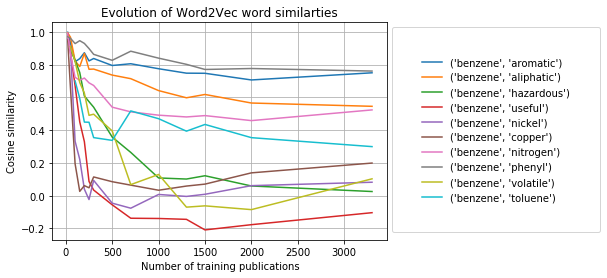

In [436]:
import matplotlib
from matplotlib import pyplot as plt
fig3 = plt.figure()
ax = fig3.add_subplot(1,1,1)
ax.plot(pub_vols,matfinal)
ax.legend(comparisons,bbox_to_anchor=(1,1),borderpad = 3)
ax.set_xlabel('Number of training publications')
ax.set_ylabel('Cosine similarity')
ax.set_title('Evolution of Word2Vec word similarties')
ax.grid()
plt.savefig('word2vec_evolution3.png',dpi = 300,bbox_inches = 'tight')
#fig.savefig('samplefigure', bbox_extra_artists=(lgd,text), bbox_inches='tight')

In [435]:
os.getcwd()

'/Users/DavidJuergens/Desktop'

In [389]:
model2 = Word2Vec.load('/Users/DavidJuergens/Desktop/CI_models_data/rank2_corpus_model/rank-2-corpus-model1.model')